In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [104]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [105]:
# 데이터 불러오기
mackerel_output=pd.read_csv('../data/mackerel/부산_고등어_생산량(선어).csv',encoding='cp949')
temperature_jung=pd.read_csv('../data/temperature/207정선_월별_2.csv')
temperature_jung_output=pd.merge(temperature_jung,mackerel_output,on=['년도','월'])
temperature_jung_output=temperature_jung_output.drop(columns='기압').rename(columns={'수온(50m)':'수온','염분(50m)':'염분','용존산소(50m)':'용존산소'})
temperature_jung_output.iloc[:,2:].corr()

,수온,염분,용존산소,생산량
수온,1.000000,-0.408384,-0.589058,0.372951
염분,-0.408384,1.000000,0.611199,-0.264948
용존산소,-0.589058,0.611199,1.000000,-0.377875
생산량,0.372951,-0.264948,-0.377875,1.000000


In [106]:
month_temperature_jung=temperature_jung_output[temperature_jung_output['월']==1]
month_temperature_jung=month_temperature_jung.reset_index().drop(columns='index')
month_temperature_jung.iloc[:,2:].corr()

,수온,염분,용존산소,생산량
수온,1.000000,0.234541,0.544893,-0.508496
염분,0.234541,1.000000,0.381810,0.035469
용존산소,0.544893,0.381810,1.000000,-0.542939
생산량,-0.508496,0.035469,-0.542939,1.000000


<Axes: >

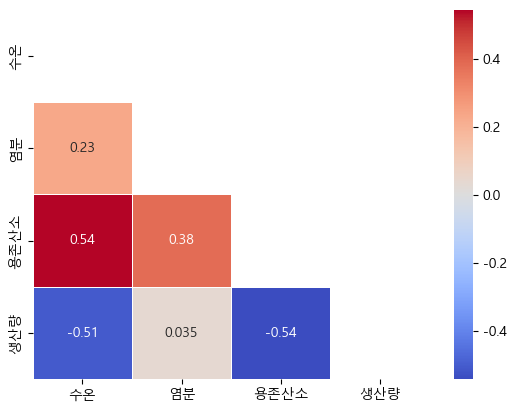

In [107]:
mask=np.triu(np.ones_like(month_temperature_jung.iloc[:,2:].corr(),dtype=bool))
sns.heatmap(month_temperature_jung.iloc[:,2:].corr(),mask=mask, annot=True,cmap='coolwarm',linewidths=.5)

In [108]:
# 데이터 표준화
scaler_x=StandardScaler()
scaler_x.fit_transform(month_temperature_jung.iloc[:,2:])
test=scaler_x.transform(month_temperature_jung.iloc[:,2:])
standard_data_jung=pd.DataFrame(test)

In [109]:
standard_data_jung.rename(columns={0:'수온',1:'염분',2:'용존산소',3:'생산량'}, inplace=True)
standard_data_jung

,수온,염분,용존산소,생산량
0,-0.144454,-3.064457,-1.041101,-0.665549
1,-0.261579,-0.730389,-0.219323,0.228052
2,1.319608,-0.539853,0.511146,-1.228002
3,-1.140016,0.293743,0.792148,-0.955450
4,0.265483,0.627182,-0.436410,2.354115
5,-1.022891,-0.682755,0.377379,1.052070
6,0.851108,1.055888,0.507722,-1.114856
7,-0.671516,0.389011,0.445860,0.337536
8,-1.257141,-0.635121,-1.311831,0.581946
9,1.085358,0.722450,0.508635,-0.596544


In [110]:
standard_data_jung['년도']=month_temperature_jung['년도']
standard_data_jung['월']=month_temperature_jung['월']
standard_data_jung

,수온,염분,용존산소,생산량,년도,월
0,-0.144454,-3.064457,-1.041101,-0.665549,2008,1
1,-0.261579,-0.730389,-0.219323,0.228052,2009,1
2,1.319608,-0.539853,0.511146,-1.228002,2010,1
3,-1.140016,0.293743,0.792148,-0.955450,2011,1
4,0.265483,0.627182,-0.436410,2.354115,2012,1
5,-1.022891,-0.682755,0.377379,1.052070,2013,1
6,0.851108,1.055888,0.507722,-1.114856,2014,1
7,-0.671516,0.389011,0.445860,0.337536,2015,1
8,-1.257141,-0.635121,-1.311831,0.581946,2016,1
9,1.085358,0.722450,0.508635,-0.596544,2017,1


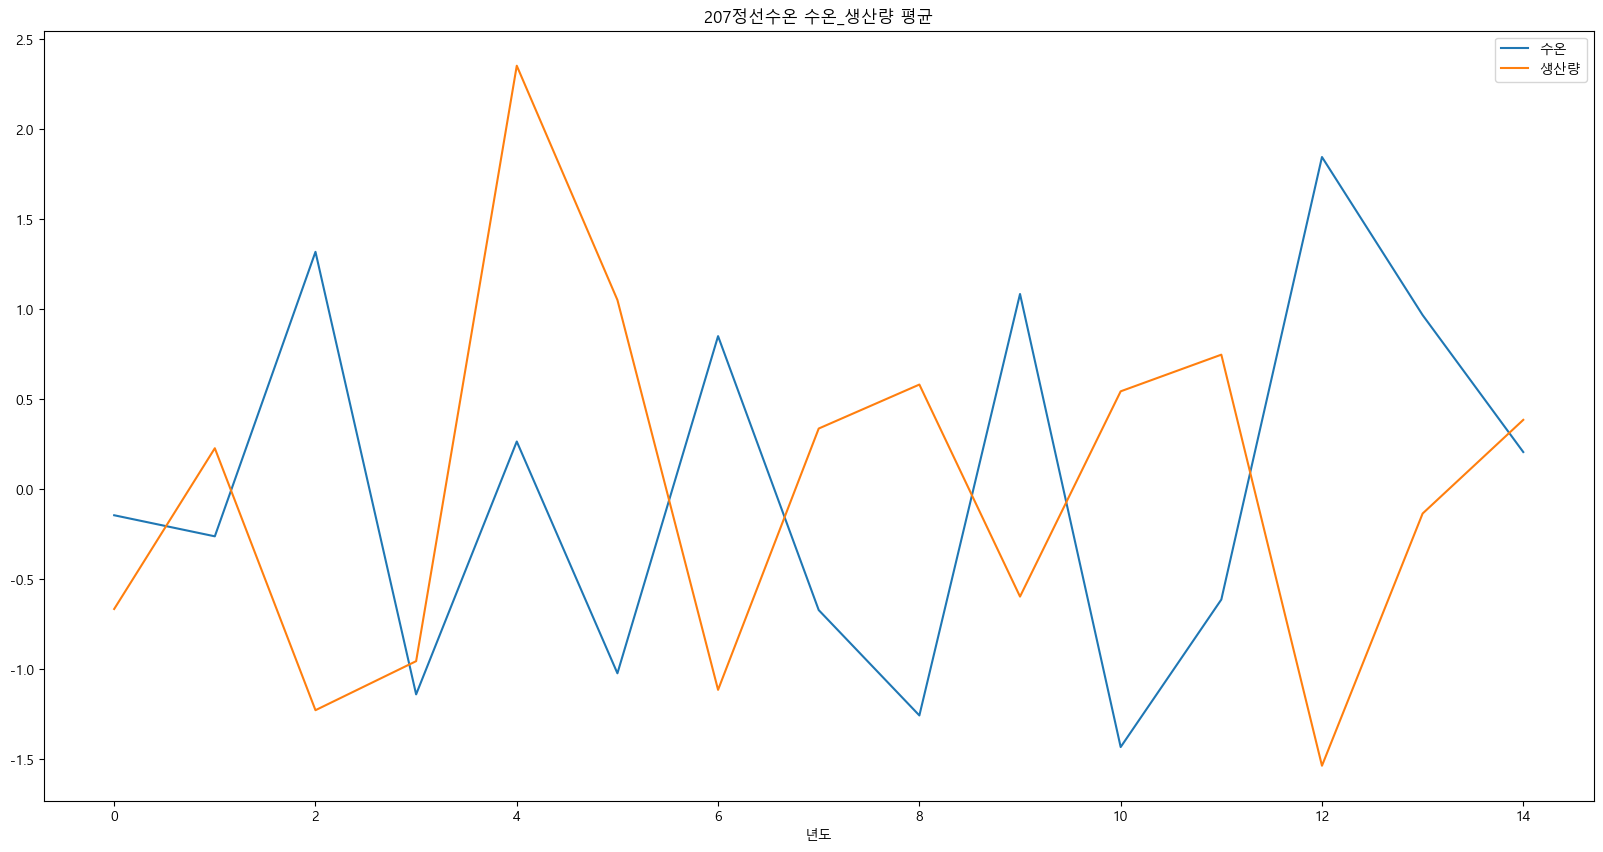

In [111]:
# 207정선수온 및 생산량 평균
plt.figure(figsize=(20,10))


plt.title('207정선수온 수온_생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['수온'],label='수온')
plt.plot(standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()

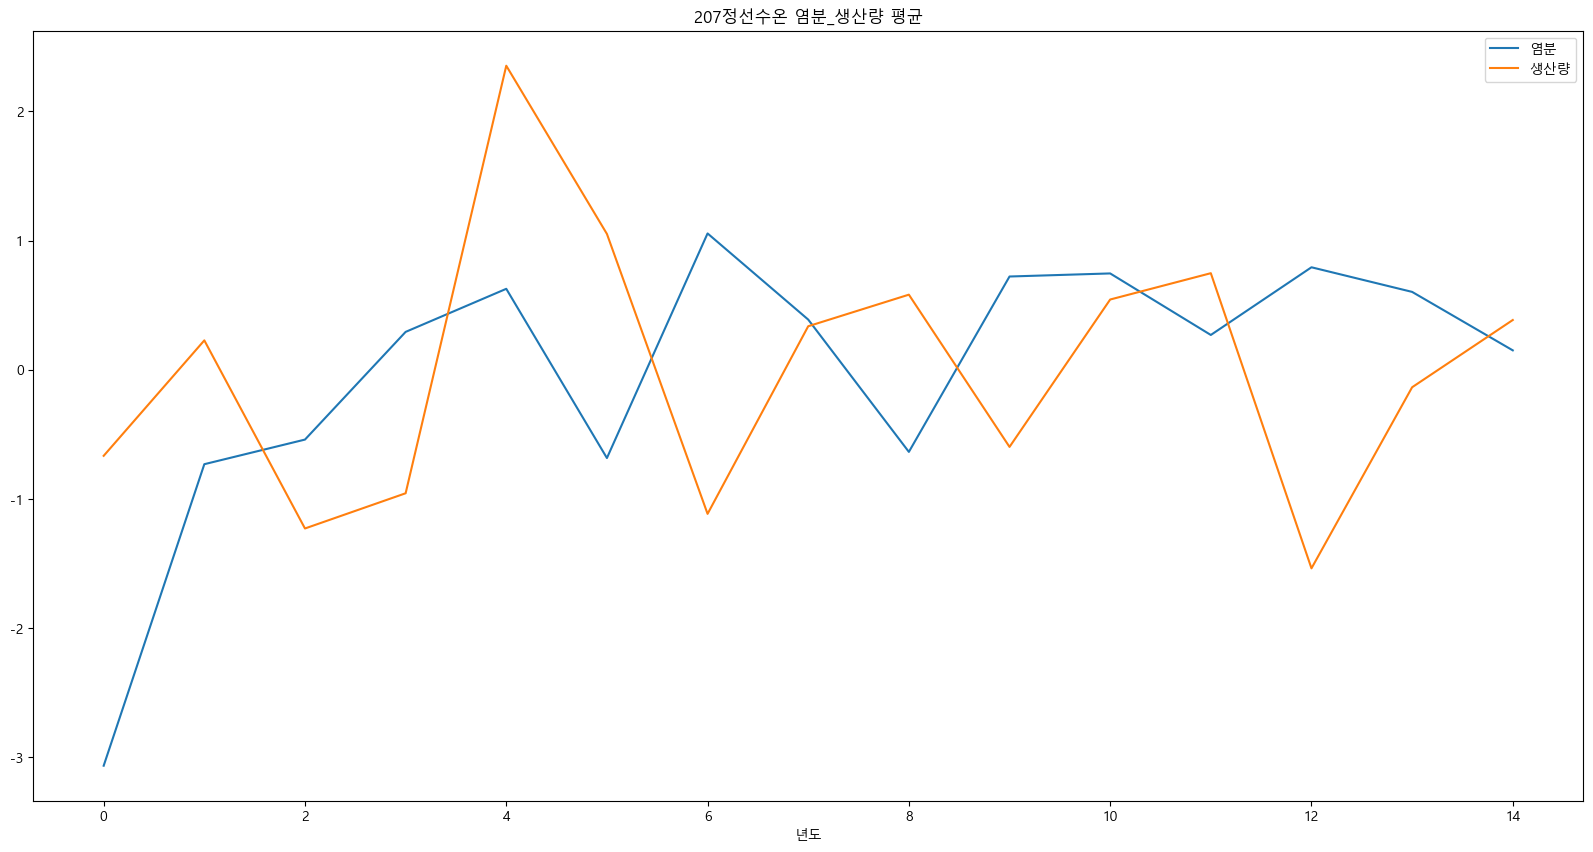

In [112]:
plt.figure(figsize=(20,10))


plt.title('207정선수온 염분_생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['염분'],label='염분')
plt.plot(standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()

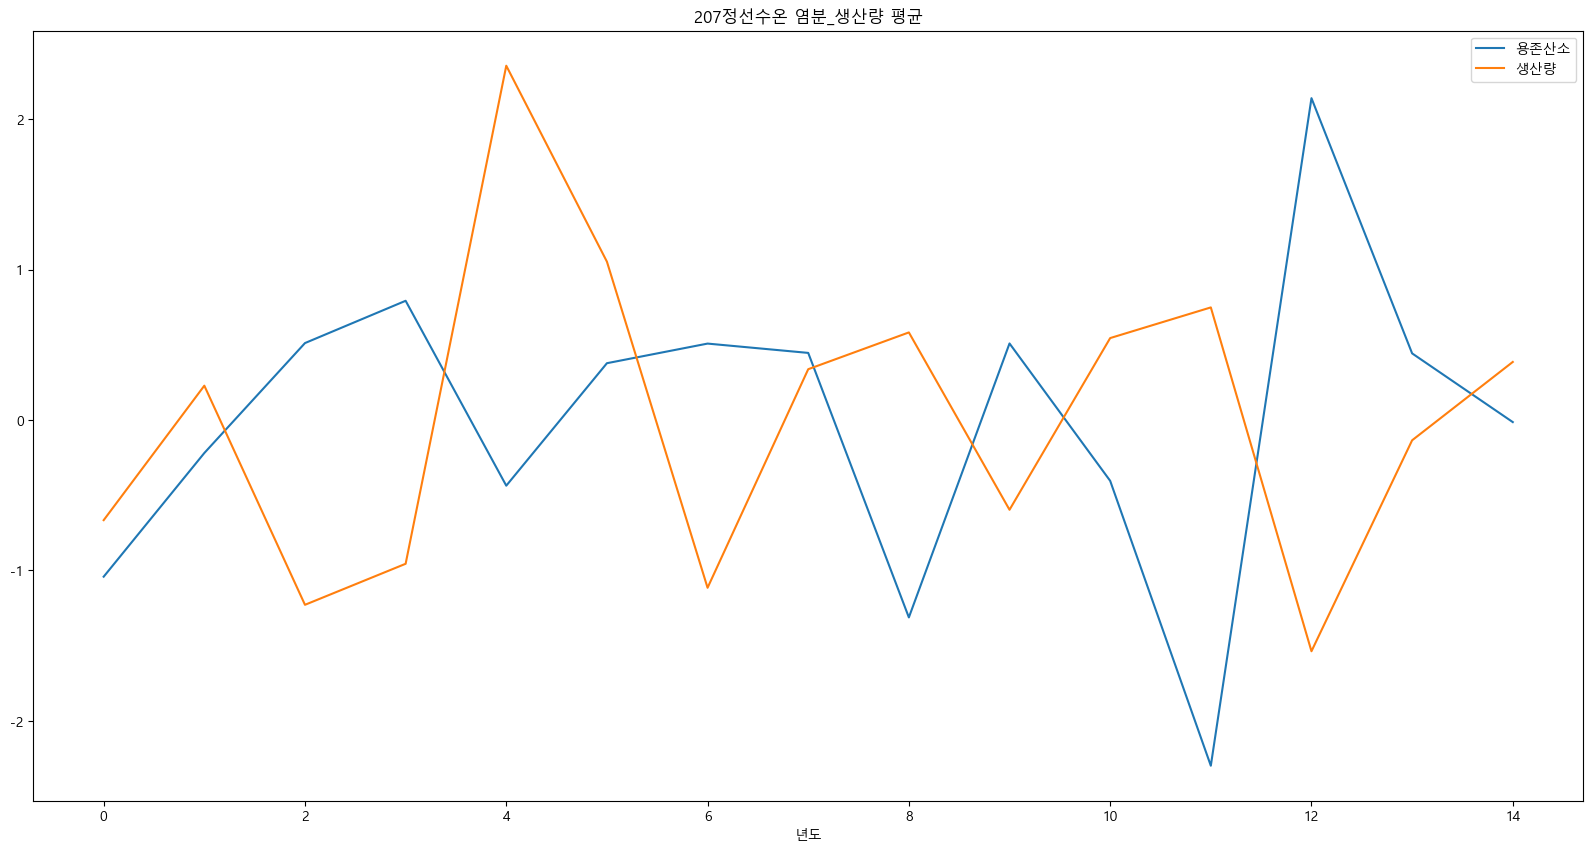

In [113]:
plt.figure(figsize=(20,10))


plt.title('207정선수온 염분_생산량 평균')
plt.xlabel('년도')
plt.plot(standard_data_jung['용존산소'],label='용존산소')
plt.plot(standard_data_jung['생산량'],label='생산량')
plt.legend()
plt.show()